In [1]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from matplotlib import animation

plt.style.use(['science','notebook','grid', 'dark_background'])

For a collection of masses: $$\frac{d^2 \vec r_i}{dt^2}=\sum_{j \neq i}\frac{Gm_j}{r^3_{ij}}\vec r_{ij}$$
where
- $\vec r_i$ is the position of the $i$th particle and $m_j$ is the mass of the $j$th particle
- $\vec r_{ij}=\vec r_j-\vec r_i$

Converting to dimensionless quantities for python: $$\frac{d^2 \vec r'_i}{dt'^2}=\sum_{j \neq i}\frac{Gm'_j}{r'^3_{ij}}\vec r'_{ij}$$
where
- $\vec r'_i=\vec r_i/L$ and $L$ is some charachteristic length
- $m'_j=m_j/M$ and $M$ is some charachteristic mass
- $t'=t\sqrt{GM/L^3}$

# A Simple Start: 2-Body Problem

Set
- $M \equiv M_E=5.97e+24$ Kilograms
- $L \equiv 1\,AU=1.5e+11$ Meters

In [139]:
# ALL CHARACHTERISTIC QUANTITIES, TO MAKE EVERYTHING DIMENSIONLESS:

M_E = 1
AU = 1
G = 1

m1 = M_E
m2 = 333030 * M_E

x1_0 = AU
y1_0 = 0
x2_0 = 0
y2_0 = 0

vx1_0 = 0
vy1_0 = np.sqrt(G * m2 / x1_0)
vx2_0 = 0
vy2_0 = 0

Any second order ODE vis. $$\frac{d^2y}{dt^2}=F\bigg(y,\frac{dy}{dt},t\bigg)$$ can be rewriteen as two coupled First Order ODEs as $$\frac{dy}{dt}=v_y$$ $$\frac{dv_y}{dt}=F(y,v_y,t)$$ Let $\vec S=\langle x_1,y_1,x_2,y_2,v_{x1},v_{y1},v_{x2},v_{y2}\rangle.$ Let's write a function that takes in $\vec S$ and returns $\displaystyle \frac{d\vec S}{dt}$

In [140]:
def dSdt(S, t):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
    r12 = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
    return [vx1, vy1, vx2, vy2, 
            m2 / r12 ** 3 * (x2 - x1), m2 / r12 ** 3 * (y2 - y1), m1 / r12 ** 3 * (x1- x2), m1 / r12 ** 3 * (y1- y2)]

Text(0, 0.5, '$s$')

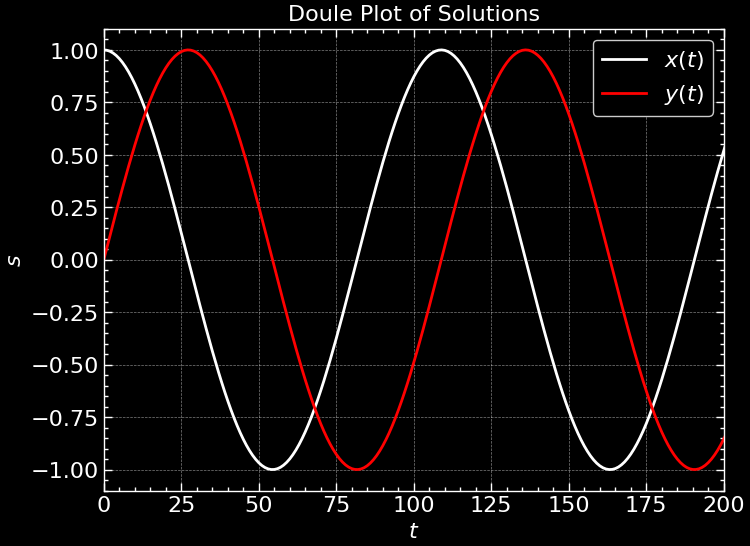

In [141]:
t = np.linspace(0, 1, 10000)
sol = odeint(dSdt, y0 = [x1_0, y1_0, x2_0, y2_0, vx1_0, vy1_0, vx2_0, vy2_0], t = t)

plt.plot(sol.T[0], label = r'$x(t)$', color = 'white')
plt.plot(sol.T[1], label = r'$y(t)$', color = 'red')

plt.xlim(0, 200)
plt.legend()

plt.title('Doule Plot of Solutions')
plt.xlabel(r'$t$')
plt.ylabel(r'$s$')

In [142]:
t_years = 1 / np.sqrt(6.6743e-11 * 5.97219e+24 / (1.495979e+11) ** 3)
t_years = t_years / (3600 * 24 * 365.25) * np.diff(t)[0]

In [143]:
x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]

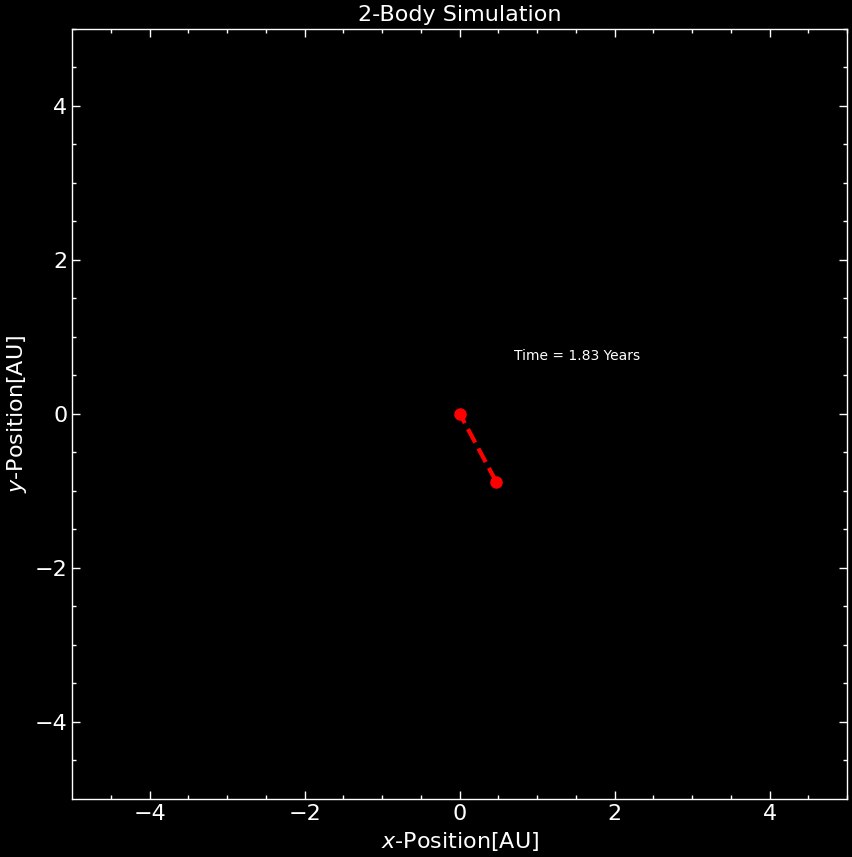

In [144]:
def animate(i):
    ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    text.set_text('Time = {:.2f} Years'.format(i * t_years))

fig, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.set_title('2-Body Simulation')
ax.set_xlabel(r'$x$-Position[AU]')
ax.set_ylabel(r'$y$-Position[AU]')

ax.grid()

ln1, = plt.plot([], [], 'ro--', lw = 3, markersize = 8)
text = plt.text(0.7, 0.7, '')

ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)

ani = animation.FuncAnimation(fig, animate, frames = 200, interval = 50)
ani.save('../Outputs/2-body_sim.gif', writer = 'pillow', fps = 30)

# 3-Body Problem:

Consider 3 bodies such that $m_1=m_2,$ are constant and $m_3$ can vary. At $t=0:$
- $x_1=-x_2$ and $x_3=0$.
- $y_1=y_2=y_3=0$.
- $v_{x1}=v_{x2}=v_1$ and $v_{x2}=v_{y2}=v_2$ where $v_1$ and $v_2$ are some defined speeds.
- $v_{x3}=-2v_1/m_3$ and $v_{y3}=-2v_2/m_3$ 

1. Stable Configuration 1: $v_1=0.9911981217,$ $v_2=0.7119472124,$ $m_3=4$
2. Stable Configuration 2: $v_1=0.39295,$ $v_2=0.09758,$ $m_3=1$

Note that all of these values are charachteristic and dimensionless.

In [2]:
config = 2 # CHANGE THIS AS YOU PLEASE


if config == 1:
    m3 = 4
    v1 = 0.9911981217
    v2 = 0.7119472124

elif config == 2:
    m3 = 1
    v1 = 0.39295
    v2 = 0.09758

m1 = 1
m2 = 1
m3 = m3

x1_0 = -1
y1_0 = 0
x2_0 = 1
y2_0 = 0
x3_0 = 0
y3_0 = 0

vx1_0 = v1
vy1_0 = v2
vx2_0 = v1
vy2_0 = v2
vx3_0 = -2 * v1 / m3
vy3_0 = -2 * v2 / m3

Define $\vec S=\langle x_1,y_1,x_2,y_2,x_3,y_3,v_{x1},v_{y1},v_{x2},v_{y2},v_{x3},v_{y3}\rangle$

In [3]:
def dSdt(t, S):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = S
    r12 = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    r13 = np.sqrt((x3 - x1) ** 2 + (y3 - y1) ** 2)
    r23 = np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2)
    return[vx1, vy1, vx2, vy2, vx3, vy3,
           m2 / r12 ** 3 * (x2 - x1) + m3 / r13 ** 3 * (x3 - x1), m2 / r12 ** 3 * (y2 - y1) + m3 / r13 ** 3 * (y3 - y1),
           m1 / r12 ** 3 * (x1 - x2) + m3 / r23 ** 3 * (x3 - x2), m1 / r12 ** 3 * (y1 - y2) + m3 / r23 ** 3 * (y3 - y2),
           m1 / r13 ** 3 * (x1 - x3) + m2 / r23 ** 3 * (x2 - x3), m1 / r13 ** 3 * (y1 - y3) + m2 / r23 ** 3 * (y2 - y3)]


In [4]:
t = np.linspace(0, 20, 1000)

sol = solve_ivp(dSdt, (0, 20), y0 = [x1_0, y1_0, x2_0, y2_0, x3_0, y3_0, vx1_0, vy1_0, vx2_0, vy2_0, vx3_0, vy3_0],
                method = 'DOP853', t_eval = t, rtol = 1e-10, atol = 1e-13)

Text(0.5, 0, '$t$')

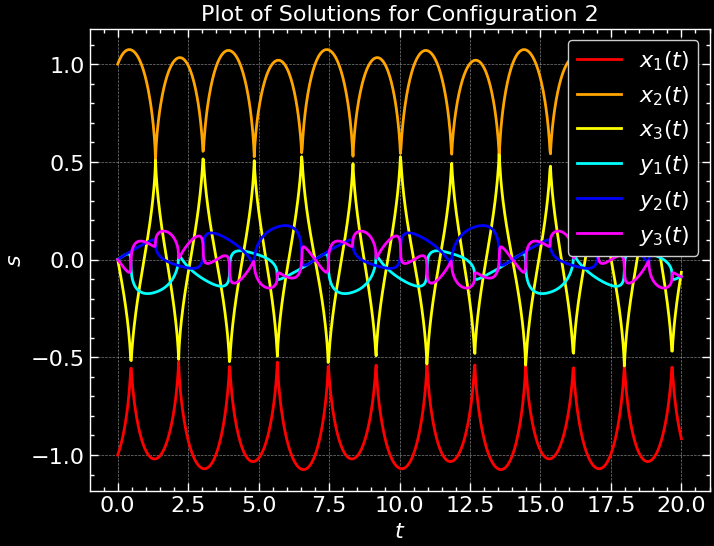

In [5]:
t = sol.t

x1 = sol.y[0]
y1 = sol.y[1]
x2 = sol.y[2]
y2 = sol.y[3]
x3 = sol.y[4]
y3 = sol.y[5]

plt.plot(t, x1, label = r'$x_1(t)$', color = 'red')
plt.plot(t, x2, label = r'$x_2(t)$', color = 'orange')
plt.plot(t, x3, label = r'$x_3(t)$', color = 'yellow')
plt.plot(t, y1, label = r'$y_1(t)$', color = 'cyan')
plt.plot(t, y2, label = r'$y_2(t)$', color = 'blue')
plt.plot(t, y3, label = r'$y_3(t)$', color = 'magenta')

plt.legend()

plt.title(r'Plot of Solutions for Configuration {}'.format(config))
plt.ylabel(r'$s$')
plt.xlabel(r'$t$')

In [6]:
t_years = 1 / np.sqrt(6.6743e-11 * 1.99e+30 / (1.495979e+11) ** 3)
t_years = t_years / (3600 * 24 * 365.25) * np.diff(t)[0]

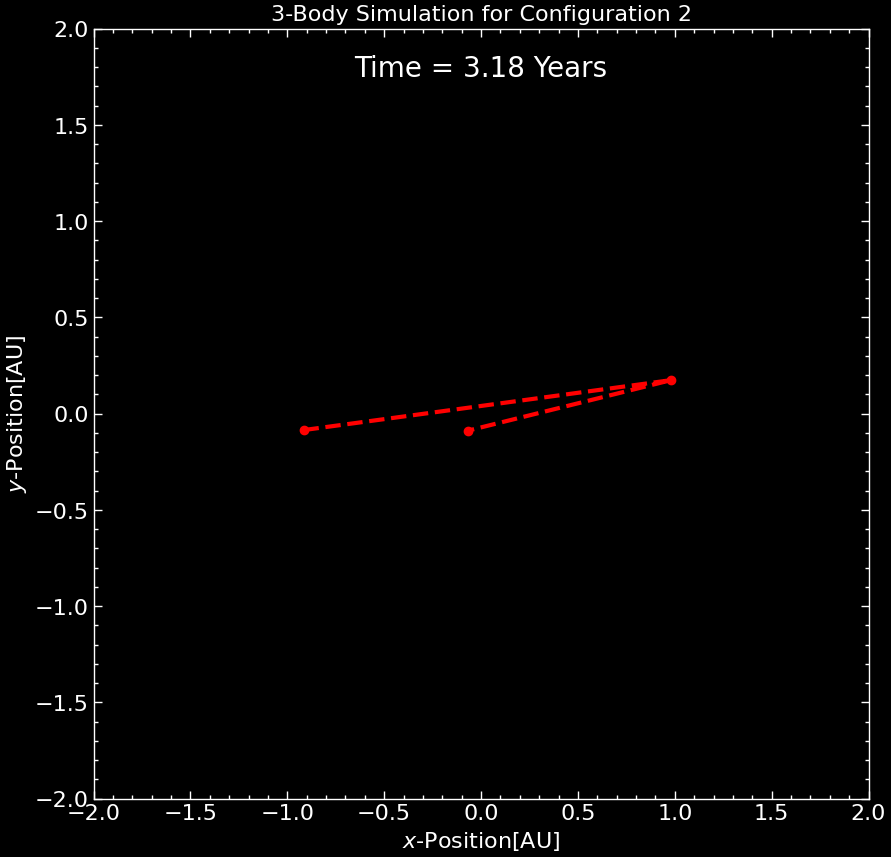

In [7]:
def animate(i):
    ln1.set_data([x1[i], x2[i], x3[i]], [y1[i], y2[i], y3[i]])
    text.set_text('Time = {:.2f} Years'.format(i * t_years))

fig, ax = plt.subplots(1, 1, figsize = (10, 10))

ax.set_title(r'3-Body Simulation for Configuration {}'.format(config))
ax.set_xlabel(r'$x$-Position[AU]')
ax.set_ylabel(r'$y$-Position[AU]')

ax.grid()

ln1, = plt.plot([], [], 'ro--', lw = 3, markersize = 6)
text = plt.text(0, 1.75, 'asdasd', fontsize = 20, backgroundcolor = 'black', ha = 'center')

ax.set_ylim(-2, 2)
ax.set_xlim(-2, 2)

ani = animation.FuncAnimation(fig, animate, frames = 1000, interval = 50)
ani.save('../Outputs/3-body_sim.gif', writer = 'pillow', fps = 30)